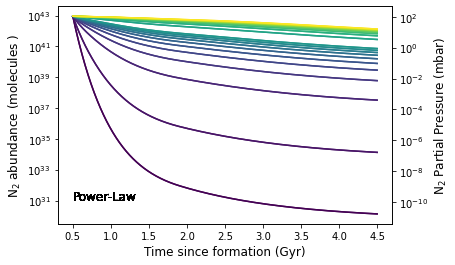

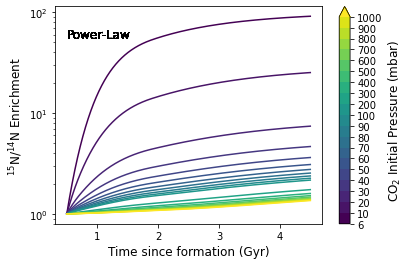

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

time_step = 1e-3
time_step_years = 1e9 * time_step
time = np.arange(0,4.5+time_step,time_step)

def N2_initial_function(N2_initial, pressure_initial):

    yield_N = 3
    yield_CO2 = 0.7

    ff_28_44 = 17.4
    ff_29_44 = 14.6
    
    CO2_current_pressure = 6 #mbar
    #CO2_current_molecules = 2.87e41 #molecules 
    CO2_initial_pressure = pressure_initial #mbar 
    
    surf_area = 1.4437e14  #m2
    avogadro = 6.022e23 #molecules/mol
    m_N2 = (28.014 / avogadro) / 1e3 #kg
    m_CO2 = (44.01 / avogadro) / 1e3 #kg

    grav = 3.721 #m s-2

    CO2_initial_molecules = (pressure_initial * 100 * surf_area) / (m_CO2 * grav) 

    power = (np.log(CO2_initial_pressure / CO2_current_pressure)) / (np.log(time[700] / time[-1]))
    base = CO2_initial_pressure / (time[700])**power

    N15_percentage = 0.003663004     #Junk and Svec 1958 referencing Nier 1950 
    N14_percentage = 0.996336996                                             #0.99645369106

    N15 = N2_initial * 2 * N15_percentage 
    #print(N15)

    N14 = N2_initial * 2 * N14_percentage
    #print(N14)

    N15_14_Terrestrial = N15 / N14 #The initial and terrestrial ratios are equal because there wasn't a significant amount of N2
    
    N29 = N15
    N28 = (N14 - N15)/2.
    #print('N28 = {}'.format(N28))

    CO2_1 = []
    CO2_prev_1 = CO2_initial_molecules
    #print('CO2 = {}'.format(CO2_sec1_prev))
    CO2_1.append(CO2_prev_1)

    N2_28_1 = []
    N2_28_prev_1 = N28
    N2_28_1.append(N2_28_prev_1)
    
    N2_29_1 = []
    N2_29_prev_1 = N29
    N2_29_1.append(N2_29_prev_1)

    N2_1 = []
    N2_prev_1 = N2_28_prev_1 + N2_29_prev_1 
    #print(N2_prev_6)
    N2_1.append(N2_prev_1)
    
    for a in reversed(time[3801:4001]):
        
               
        CO2_loss_rate_1 = (3.56e25 * np.exp(-1.88 * (4.5-a))) * (1e9 * 365 * 24 * 60 * 60)
        SP_N2_28_1 = CO2_loss_rate_1 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_1 / CO2_prev_1) * time_step#* rate_factor

        
        N2_28_current1 = N2_28_prev_1 - SP_N2_28_1 
        N2_28_prev_1 = N2_28_current1
        
        
        CO2_current1 = CO2_initial_molecules
        
        CO2_prev_1 = CO2_current1
        
        CO2_1.append(CO2_current1)

        
        SP_N2_29_1 = CO2_loss_rate_1 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_1 / CO2_prev_1) * time_step
        
        
        N2_29_current1 = N2_29_prev_1 - SP_N2_29_1
        N2_29_prev_1 = N2_29_current1
        
        
        N2_28_1.append(N2_28_prev_1) 
        N2_29_1.append(N2_29_prev_1)
        
        
        N2_current1 = N2_28_current1 + N2_29_current1
        N2_1.append(N2_current1)

        
    CO2_2 = []
    CO2_prev_2 = CO2_1[-1]
   
    N2_28_2 = []
    N2_28_prev_2 = N2_28_1[-1]

    N2_29_2 = []
    N2_29_prev_2 = N2_29_1[-1]

    N2_2 = []
        
    
    for b in reversed(time[3671:3801]):
        
        CO2_loss_rate_2 = (3.56e25 * np.exp(-1.88 * (4.5-b))) * (1e9 * 365 * 24 * 60 * 60)
        SP_N2_28_2 = CO2_loss_rate_2 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_2 / CO2_prev_2) * time_step#* rate_factor

    
        N2_28_current2 = N2_28_prev_2 - SP_N2_28_2 
        N2_28_prev_2 = N2_28_current2
        
        
        CO2_mbar2 = base * (4.5 - b)**power
        CO2_current2 = (CO2_mbar2 * 100 * surf_area) / (m_CO2 * grav)  #km-3 #CO2_current = (CO2_mbar * 100 * surface_area) / (molecular_mass_CO2 * grav_acceleration)
        
        CO2_prev_2 = CO2_current2
        
        CO2_2.append(CO2_current2)

                
        SP_N2_29_2 = CO2_loss_rate_2 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_2 / CO2_prev_2) * time_step
        
        
        N2_29_current2 = N2_29_prev_2 - SP_N2_29_2
        N2_29_prev_2 = N2_29_current2
        
        
        N2_28_2.append(N2_28_prev_2) 
        N2_29_2.append(N2_29_prev_2)
        
        
        N2_current2 = N2_28_current2 + N2_29_current2
        N2_2.append(N2_current2)

    
        
    CO2_3 = []
    CO2_prev_3 = CO2_2[-1]
   
    N2_28_3 = []
    N2_28_prev_3 = N2_28_2[-1]

    N2_29_3 = []
    N2_29_prev_3 = N2_29_2[-1]

    N2_3 = []
    
    
    for c in reversed(time[2801:3671]):
         

        CO2_loss_rate_3 = (3.56e25 * np.exp(-1.88 * (4.5-c))) * (1e9 * 365 * 24 * 60 * 60)
        SP_N2_28_3 = CO2_loss_rate_3 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_3 / CO2_prev_3) * time_step#* rate_factor

    
        N2_28_current3 = N2_28_prev_3 - SP_N2_28_3 
        N2_28_prev_3 = N2_28_current3
        
        
        CO2_mbar3 = base * (4.5 - c)**power
        
        CO2_current3 = (CO2_mbar3 * 100 * surf_area) / (m_CO2 * grav)  #km-3
        
        CO2_prev_3 = CO2_current3
        
        CO2_3.append(CO2_current3)

              
        SP_N2_29_3 = CO2_loss_rate_3 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_3 / CO2_prev_3) * time_step
        
        
        N2_29_current3 = N2_29_prev_3 - SP_N2_29_3
        N2_29_prev_3 = N2_29_current3
        
        
        N2_28_3.append(N2_28_prev_3) 
        N2_29_3.append(N2_29_prev_3)
        
        
        N2_current3 = N2_28_current3 + N2_29_current3 
        N2_3.append(N2_current3)

                
    CO2_4 = []
    CO2_prev_4 = CO2_3[-1]
   
    N2_28_4 = []
    N2_28_prev_4 = N2_28_3[-1]

    N2_29_4 = []
    N2_29_prev_4 = N2_29_3[-1]

    N2_4 = []
        
    
    for d in reversed(time[2601:2801]):
        

        CO2_loss_rate_4 = (3.56e25 * np.exp(-1.88 * (4.5-d))) * (1e9 * 365 * 24 * 60 * 60)
        SP_N2_28_4 = CO2_loss_rate_4 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_4 / CO2_prev_4) * time_step#* rate_factor

    
        N2_28_current4 = N2_28_prev_4 - SP_N2_28_4 
        N2_28_prev_4 = N2_28_current4
        
        
        CO2_mbar4 = base * (4.5 - d)**power
        
        CO2_current4 = (CO2_mbar4 * 100 * surf_area) / (m_CO2 * grav)  #km-3
        
        CO2_prev_4 = CO2_current4
        
        CO2_4.append(CO2_current4)

                
        SP_N2_29_4 = CO2_loss_rate_4 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_4 / CO2_prev_4) * time_step
        
        
        N2_29_current4 = N2_29_prev_4 - SP_N2_29_4
        N2_29_prev_4 = N2_29_current4
        
        
        N2_28_4.append(N2_28_prev_4) 
        N2_29_4.append(N2_29_prev_4)
        
        
        N2_current4 = N2_28_current4 + N2_29_current4 
        N2_4.append(N2_current4)

        
    CO2_5 = []
    CO2_prev_5 = CO2_4[-1]
   
    N2_28_5 = []
    N2_28_prev_5 = N2_28_4[-1]

    N2_29_5 = []
    N2_29_prev_5 = N2_29_4[-1]

    N2_5 = []
    
    
    for e in reversed(time[2501:2601]):
        

        CO2_loss_rate_5 = (3.62e24 * np.exp(-6.78e-1 * (4.5-e))) * (1e9 * 365 * 24 * 60 * 60)
        SP_N2_28_5 = CO2_loss_rate_5 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_5 / CO2_prev_5) * time_step#* rate_factor

    
        N2_28_current5 = N2_28_prev_5 - SP_N2_28_5 
        N2_28_prev_5 = N2_28_current5
        
        
        CO2_mbar5 = base * (4.5 - e)**power
        
        CO2_current5 = (CO2_mbar5 * 100 * surf_area) / (m_CO2 * grav)  #km-3
        
        CO2_prev_5 = CO2_current5
        
        CO2_5.append(CO2_current5)

        
        SP_N2_29_5 = CO2_loss_rate_5 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_5 / CO2_prev_5) * time_step
        
        
        N2_29_current5 = N2_29_prev_5 - SP_N2_29_5
        N2_29_prev_5 = N2_29_current5
        
        
        N2_28_5.append(N2_28_prev_5) 
        N2_29_5.append(N2_29_prev_5)
        
        
        N2_current5 = N2_28_current5 + N2_29_current5 
        N2_5.append(N2_current5)

                
    CO2_6 = []
    CO2_prev_6 = CO2_5[-1]
   
    N2_28_6 = []
    N2_28_prev_6 = N2_28_5[-1]

    N2_29_6 = []
    N2_29_prev_6 = N2_29_5[-1]

    N2_6 = []
    
    
    for f in reversed(time[701:2501]):
        
            
        CO2_loss_rate_6 = (3.62e24 * np.exp(-6.78e-1 * (4.5-f))) * (1e9 * 365 * 24 * 60 * 60)
        SP_N2_28_6 = CO2_loss_rate_6 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_6 / CO2_prev_6) * time_step#* rate_factor

    
        N2_28_current6 = N2_28_prev_6 - SP_N2_28_6 
        N2_28_prev_6 = N2_28_current6
        
        
        CO2_mbar6 = base * (4.5 - f)**power
        
        CO2_current6 = (CO2_mbar6 * 100 * surf_area) / (m_CO2 * grav)  #km-3
        
        CO2_prev_6 = CO2_current6
        
        CO2_6.append(CO2_current6)

                
        SP_N2_29_6 = CO2_loss_rate_6 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_6 / CO2_prev_6) * time_step
        
        
        N2_29_current6 = N2_29_prev_6 - SP_N2_29_6
        N2_29_prev_6 = N2_29_current6
        
        
        N2_28_6.append(N2_28_prev_6) 
        N2_29_6.append(N2_29_prev_6)
        
        
        N2_current6 = N2_28_current6 + N2_29_current6 
        N2_6.append(N2_current6)

        
        
    CO2_7 = []
    CO2_prev_7 = CO2_6[-1]
   
    N2_28_7 = []
    N2_28_prev_7 = N2_28_6[-1]

    N2_29_7 = []
    N2_29_prev_7 = N2_29_6[-1]

    N2_7 = []
    
    
    for g in reversed(time[1:701]):
            

        CO2_loss_rate_7 = (3.62e24 * np.exp(-6.78e-1 * (4.5-g))) * (1e9 * 365 * 24 * 60 * 60)
        #print(CO2_loss_rate_7)
        
        SP_N2_28_7 = CO2_loss_rate_7 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_7 / CO2_prev_7) * time_step#* rate_factor

    
        N2_28_current7 = N2_28_prev_7 - SP_N2_28_7 
        N2_28_prev_7 = N2_28_current7
        
        
        CO2_mbar7 = base * (4.5 - g)**power
        
        CO2_current7 = (CO2_mbar7 * 100 * surf_area) / (m_CO2 * grav)  #km-3
        
        CO2_prev_7 = CO2_current7
        
        CO2_7.append(CO2_current7)

                
        SP_N2_29_7 = CO2_loss_rate_7 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_7 / CO2_prev_7) * time_step
        
        
        N2_29_current7 = N2_29_prev_7 - SP_N2_29_7
        N2_29_prev_7 = N2_29_current7
        
        
        N2_28_7.append(N2_28_prev_7) 
        N2_29_7.append(N2_29_prev_7)
        
        
        N2_current7 = N2_28_current7 + N2_29_current7 
        N2_7.append(N2_current7)

        
            
    N2_28_all = N2_28_1 + N2_28_2 + N2_28_3 + N2_28_4 + N2_28_5 + N2_28_6 + N2_28_7  
    N2_29_all = N2_29_1 + N2_29_2 + N2_29_3 + N2_29_4 + N2_29_5 + N2_29_6 + N2_29_7  
    N2_all = N2_1 + N2_2 + N2_3 + N2_4 + N2_5 + N2_6 + N2_7  
        
    N14_all = np.add([b * 2 for b in N2_28_all], N2_29_all)
    N15_all = N2_29_all
    N14_15 = np.divide(N14_all, N15_all)
    N15_14 = np.divide(N15_all, N14_all)
    N15_14_Enrichment = [l / N15_14_Terrestrial for l in N15_14]
    #print(N14_15[-1])

    #return(N2_all, N15_14, N15_14_Enrichment)
    return(N2_all, N15_14, N15_14_Enrichment)


today_N15_14 = 1/170
today_enrichment = today_N15_14 / 0.0035589299952590208
#print(today_enrichment)

surf_area = 1.4437e14 #m2
avogadro = 6.022e23 #molecules/mol
m_N2 = (28.014 / avogadro) / 1e3 #kg #amu  
m_CO2 = (44.01 / avogadro) / 1e3 #kg #amu
grav_acc = 3.721 #m/s2

N2_plot = []
N2_plot_pressure = []
N15_14_plot = [] 
N15_14_En_plot = []
#CO2_plot = []

pressure_list = [6,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000] #np.arange(100, 1100, 100) #[6,10,20,30,40,50,60,70,80,90,100] # # ## # # # #

for pressure in pressure_list:
    Returns = N2_initial_function(9.2007e42, pressure) 
    N2_plot.append(Returns[0])
    N15_14_plot.append(Returns[1])
    N15_14_En_plot.append(Returns[2])
    #CO2_plot.append(Returns[3])

N2_plot_array = np.array(N2_plot)

for b in N2_plot_array:
    N2_pressure = ((b * m_N2 * grav_acc) / surf_area) * 0.01
    N2_plot_pressure.append(N2_pressure)

cmap = plt.get_cmap('viridis')#, len(pressure))
colors = cmap(np.linspace(0, 1, len(pressure_list)))
cmap, norm = mcolors.from_levels_and_colors(pressure_list, colors, extend='max')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


plt.figure(0)
for i, j in enumerate(N2_plot):
    plt.plot(time[500:4501], j, c=cmap(i))
    plt.yscale('log')
    plt.xlabel('Time since formation (Gyr)', fontsize=12)
    plt.ylabel('N$_2$ abundance (molecules )', fontsize=12)
    plt.text(0.5,1e31,'Power-Law',size=12)
        
plt.twinx()
for k, l in enumerate(N2_plot_pressure):
    #c = next(color)
    plt.plot(time[500:4501], l, c=cmap(k)) 
    plt.yscale('log')
    plt.ylabel('N$_2$ Partial Pressure (mbar)', fontsize=12)


plt.savefig('sputtering_for_paperA_new.png', dpi=300, bbox_inches='tight')
"""
plt.figure(1)
for k in N15_14_plot:
    plt.plot(time[1000:4501], k)
    plt.yscale('log')
    plt.ylabel('N$_2$ abundance lost (molecules )')
    plt.xlabel('Time since formation (Gyr)')
    plt.title('Abundances lost with DR and Sputtering ')
    plt.legend(pressure, title = 'CO$_2$ Initial Pressure (mbar)', bbox_to_anchor=(1.05, 1), loc='upper left')
"""
plt.figure(1)
for i, l in enumerate(N15_14_En_plot):
    plt.plot(time[500:4501], l, c=cmap(i))
    plt.xlabel('Time since formation (Gyr)', fontsize=12)
    plt.ylabel('$^{15}$N/$^{14}$N Enrichment', fontsize=12)
    plt.yscale('log')
    plt.text(0.5,55,'Power-Law',size=12)
    

plt.colorbar(sm, ticks=pressure_list).set_label(label="CO$_2$ Initial Pressure (mbar)", size=12)    
plt.savefig('sputtering_for_paperE_new.png', dpi=300, bbox_inches='tight')


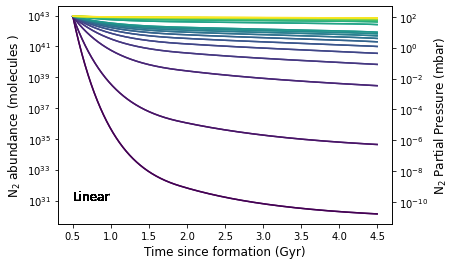

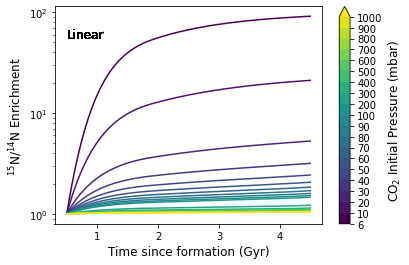

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

time_step = 1e-3
time_step_years = 1e9 * time_step
time = np.arange(0,4.5+time_step,time_step)

def N2_initial_function(N2_initial, pressure_initial):

    yield_N = 3
    yield_CO2 = 0.7

    ff_28_44 = 17.4
    ff_29_44 = 14.6
    
    CO2_current_pressure = 6 #mbar
    #CO2_current_molecules = 2.87e41 #molecules 
    CO2_initial_pressure = pressure_initial #mbar 
    
    surf_area = 1.4437e14  #m2
    avogadro = 6.022e23 #molecules/mol
    m_N2 = (28.014 / avogadro) / 1e3 #kg
    m_CO2 = (44.01 / avogadro) / 1e3 #kg

    grav = 3.721 #m s-2

    CO2_initial_molecules = (pressure_initial * 100 * surf_area) / (m_CO2 * grav) 

    slope = (CO2_initial_pressure - CO2_current_pressure) / (time[700] - time[-1])
    intercept = CO2_current_pressure - (slope * time[-1])

    N15_percentage = 0.003663004     #Junk and Svec 1958 referencing Nier 1950 
    N14_percentage = 0.996336996                                             #0.99645369106

    N15 = N2_initial * 2 * N15_percentage 
    #print(N15)

    N14 = N2_initial * 2 * N14_percentage
    #print(N14)

    N15_14_Terrestrial = N15 / N14 #The initial and terrestrial ratios are equal because there wasn't a significant amount of N2
    
    N29 = N15
    N28 = (N14 - N15)/2.
    #print('N28 = {}'.format(N28))

    CO2_1 = []
    CO2_prev_1 = CO2_initial_molecules
    #print('CO2 = {}'.format(CO2_sec1_prev))
    CO2_1.append(CO2_prev_1)

    N2_28_1 = []
    N2_28_prev_1 = N28
    N2_28_1.append(N2_28_prev_1)
    
    N2_29_1 = []
    N2_29_prev_1 = N29
    N2_29_1.append(N2_29_prev_1)

    N2_1 = []
    N2_prev_1 = N2_28_prev_1 + N2_29_prev_1 
    #print(N2_prev_6)
    N2_1.append(N2_prev_1)
    
    for a in reversed(time[3801:4001]):
        
               
        CO2_loss_rate_1 = (3.56e25 * np.exp(-1.88 * (4.5-a))) * (1e9 * 365 * 24 * 60 * 60)
        SP_N2_28_1 = CO2_loss_rate_1 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_1 / CO2_prev_1) * time_step#* rate_factor

        
        N2_28_current1 = N2_28_prev_1 - SP_N2_28_1 
        N2_28_prev_1 = N2_28_current1
        
        
        CO2_current1 = CO2_initial_molecules
        
        CO2_prev_1 = CO2_current1
        
        CO2_1.append(CO2_current1)

        
        SP_N2_29_1 = CO2_loss_rate_1 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_1 / CO2_prev_1) * time_step
        
        
        N2_29_current1 = N2_29_prev_1 - SP_N2_29_1
        N2_29_prev_1 = N2_29_current1
        
        
        N2_28_1.append(N2_28_prev_1) 
        N2_29_1.append(N2_29_prev_1)
        
        
        N2_current1 = N2_28_current1 + N2_29_current1
        N2_1.append(N2_current1)

        
    CO2_2 = []
    CO2_prev_2 = CO2_1[-1]
   
    N2_28_2 = []
    N2_28_prev_2 = N2_28_1[-1]

    N2_29_2 = []
    N2_29_prev_2 = N2_29_1[-1]

    N2_2 = []
        
    
    for b in reversed(time[3671:3801]):
        
        CO2_loss_rate_2 = (3.56e25 * np.exp(-1.88 * (4.5-b))) * (1e9 * 365 * 24 * 60 * 60)
        SP_N2_28_2 = CO2_loss_rate_2 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_2 / CO2_prev_2) * time_step#* rate_factor

    
        N2_28_current2 = N2_28_prev_2 - SP_N2_28_2 
        N2_28_prev_2 = N2_28_current2
        
        
        CO2_mbar2 = (slope * (4.5 - b)) + intercept
        CO2_current2 = (CO2_mbar2 * 100 * surf_area) / (m_CO2 * grav)  #km-3 #CO2_current = (CO2_mbar * 100 * surface_area) / (molecular_mass_CO2 * grav_acceleration)
        
        CO2_prev_2 = CO2_current2
        
        CO2_2.append(CO2_current2)

                
        SP_N2_29_2 = CO2_loss_rate_2 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_2 / CO2_prev_2) * time_step
        
        
        N2_29_current2 = N2_29_prev_2 - SP_N2_29_2
        N2_29_prev_2 = N2_29_current2
        
        
        N2_28_2.append(N2_28_prev_2) 
        N2_29_2.append(N2_29_prev_2)
        
        
        N2_current2 = N2_28_current2 + N2_29_current2
        N2_2.append(N2_current2)

    
        
    CO2_3 = []
    CO2_prev_3 = CO2_2[-1]
   
    N2_28_3 = []
    N2_28_prev_3 = N2_28_2[-1]

    N2_29_3 = []
    N2_29_prev_3 = N2_29_2[-1]

    N2_3 = []
    
    
    for c in reversed(time[2801:3671]):
         

        CO2_loss_rate_3 = (3.56e25 * np.exp(-1.88 * (4.5-c))) * (1e9 * 365 * 24 * 60 * 60)
        SP_N2_28_3 = CO2_loss_rate_3 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_3 / CO2_prev_3) * time_step#* rate_factor

    
        N2_28_current3 = N2_28_prev_3 - SP_N2_28_3 
        N2_28_prev_3 = N2_28_current3
        
        
        CO2_mbar3 = (slope * (4.5 - c)) + intercept 
        
        CO2_current3 = (CO2_mbar3 * 100 * surf_area) / (m_CO2 * grav)  #km-3
        
        CO2_prev_3 = CO2_current3
        
        CO2_3.append(CO2_current3)

              
        SP_N2_29_3 = CO2_loss_rate_3 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_3 / CO2_prev_3) * time_step
        
        
        N2_29_current3 = N2_29_prev_3 - SP_N2_29_3
        N2_29_prev_3 = N2_29_current3
        
        
        N2_28_3.append(N2_28_prev_3) 
        N2_29_3.append(N2_29_prev_3)
        
        
        N2_current3 = N2_28_current3 + N2_29_current3 
        N2_3.append(N2_current3)

                
    CO2_4 = []
    CO2_prev_4 = CO2_3[-1]
   
    N2_28_4 = []
    N2_28_prev_4 = N2_28_3[-1]

    N2_29_4 = []
    N2_29_prev_4 = N2_29_3[-1]

    N2_4 = []
        
    
    for d in reversed(time[2601:2801]):
        

        CO2_loss_rate_4 = (3.56e25 * np.exp(-1.88 * (4.5-d))) * (1e9 * 365 * 24 * 60 * 60)
        SP_N2_28_4 = CO2_loss_rate_4 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_4 / CO2_prev_4) * time_step#* rate_factor

    
        N2_28_current4 = N2_28_prev_4 - SP_N2_28_4 
        N2_28_prev_4 = N2_28_current4
        
        
        CO2_mbar4 = (slope * (4.5 - d)) + intercept 
        
        CO2_current4 = (CO2_mbar4 * 100 * surf_area) / (m_CO2 * grav)  #km-3
        
        CO2_prev_4 = CO2_current4
        
        CO2_4.append(CO2_current4)

                
        SP_N2_29_4 = CO2_loss_rate_4 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_4 / CO2_prev_4) * time_step
        
        
        N2_29_current4 = N2_29_prev_4 - SP_N2_29_4
        N2_29_prev_4 = N2_29_current4
        
        
        N2_28_4.append(N2_28_prev_4) 
        N2_29_4.append(N2_29_prev_4)
        
        
        N2_current4 = N2_28_current4 + N2_29_current4 
        N2_4.append(N2_current4)

        
    CO2_5 = []
    CO2_prev_5 = CO2_4[-1]
   
    N2_28_5 = []
    N2_28_prev_5 = N2_28_4[-1]

    N2_29_5 = []
    N2_29_prev_5 = N2_29_4[-1]

    N2_5 = []
    
    
    for e in reversed(time[2501:2601]):
        

        CO2_loss_rate_5 = (3.62e24 * np.exp(-6.78e-1 * (4.5-e))) * (1e9 * 365 * 24 * 60 * 60)
        SP_N2_28_5 = CO2_loss_rate_5 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_5 / CO2_prev_5) * time_step#* rate_factor

    
        N2_28_current5 = N2_28_prev_5 - SP_N2_28_5 
        N2_28_prev_5 = N2_28_current5
        
        
        CO2_mbar5 = (slope * (4.5 - e)) + intercept
        
        CO2_current5 = (CO2_mbar5 * 100 * surf_area) / (m_CO2 * grav)  #km-3
        
        CO2_prev_5 = CO2_current5
        
        CO2_5.append(CO2_current5)

        
        SP_N2_29_5 = CO2_loss_rate_5 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_5 / CO2_prev_5) * time_step
        
        
        N2_29_current5 = N2_29_prev_5 - SP_N2_29_5
        N2_29_prev_5 = N2_29_current5
        
        
        N2_28_5.append(N2_28_prev_5) 
        N2_29_5.append(N2_29_prev_5)
        
        
        N2_current5 = N2_28_current5 + N2_29_current5 
        N2_5.append(N2_current5)

                
    CO2_6 = []
    CO2_prev_6 = CO2_5[-1]
   
    N2_28_6 = []
    N2_28_prev_6 = N2_28_5[-1]

    N2_29_6 = []
    N2_29_prev_6 = N2_29_5[-1]

    N2_6 = []
    
    
    for f in reversed(time[701:2501]):
        
            
        CO2_loss_rate_6 = (3.62e24 * np.exp(-6.78e-1 * (4.5-f))) * (1e9 * 365 * 24 * 60 * 60)
        SP_N2_28_6 = CO2_loss_rate_6 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_6 / CO2_prev_6) * time_step#* rate_factor

    
        N2_28_current6 = N2_28_prev_6 - SP_N2_28_6 
        N2_28_prev_6 = N2_28_current6
        
        
        CO2_mbar6 = (slope * (4.5 - f)) + intercept 
        
        CO2_current6 = (CO2_mbar6 * 100 * surf_area) / (m_CO2 * grav)  #km-3
        
        CO2_prev_6 = CO2_current6
        
        CO2_6.append(CO2_current6)

                
        SP_N2_29_6 = CO2_loss_rate_6 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_6 / CO2_prev_6) * time_step
        
        
        N2_29_current6 = N2_29_prev_6 - SP_N2_29_6
        N2_29_prev_6 = N2_29_current6
        
        
        N2_28_6.append(N2_28_prev_6) 
        N2_29_6.append(N2_29_prev_6)
        
        
        N2_current6 = N2_28_current6 + N2_29_current6 
        N2_6.append(N2_current6)

        
        
    CO2_7 = []
    CO2_prev_7 = CO2_6[-1]
   
    N2_28_7 = []
    N2_28_prev_7 = N2_28_6[-1]

    N2_29_7 = []
    N2_29_prev_7 = N2_29_6[-1]

    N2_7 = []
    
    
    for g in reversed(time[1:701]):
            

        CO2_loss_rate_7 = (3.62e24 * np.exp(-6.78e-1 * (4.5-g))) * (1e9 * 365 * 24 * 60 * 60)
        SP_N2_28_7 = CO2_loss_rate_7 * ((yield_N / 2) / yield_CO2) * ff_28_44 * (N2_28_prev_7 / CO2_prev_7) * time_step#* rate_factor

    
        N2_28_current7 = N2_28_prev_7 - SP_N2_28_7 
        N2_28_prev_7 = N2_28_current7
        
        
        CO2_mbar7 = (slope * (4.5 - g)) + intercept
        
        CO2_current7 = (CO2_mbar7 * 100 * surf_area) / (m_CO2 * grav)  #km-3
        
        CO2_prev_7 = CO2_current7
        
        CO2_7.append(CO2_current7)

                
        SP_N2_29_7 = CO2_loss_rate_7 * ((yield_N / 2) / yield_CO2) * ff_29_44 * (N2_29_prev_7 / CO2_prev_7) * time_step
        
        
        N2_29_current7 = N2_29_prev_7 - SP_N2_29_7
        N2_29_prev_7 = N2_29_current7
        
        
        N2_28_7.append(N2_28_prev_7) 
        N2_29_7.append(N2_29_prev_7)
        
        
        N2_current7 = N2_28_current7 + N2_29_current7 
        N2_7.append(N2_current7)

        
            
    N2_28_all = N2_28_1 + N2_28_2 + N2_28_3 + N2_28_4 + N2_28_5 + N2_28_6 + N2_28_7  
    N2_29_all = N2_29_1 + N2_29_2 + N2_29_3 + N2_29_4 + N2_29_5 + N2_29_6 + N2_29_7  
    N2_all = N2_1 + N2_2 + N2_3 + N2_4 + N2_5 + N2_6 + N2_7  
        
    N14_all = np.add([b * 2 for b in N2_28_all], N2_29_all)
    N15_all = N2_29_all
    N14_15 = np.divide(N14_all, N15_all)
    N15_14 = np.divide(N15_all, N14_all)
    N15_14_Enrichment = [l / N15_14_Terrestrial for l in N15_14]
    #print(N14_15[-1])

    #return(N2_all, N15_14, N15_14_Enrichment)
    return(N2_all, N15_14, N15_14_Enrichment)


today_N15_14 = 1/170
today_enrichment = today_N15_14 / 0.0035589299952590208
#print(today_enrichment)

surf_area = 1.4437e14 #m2
avogadro = 6.022e23 #molecules/mol
m_N2 = (28.014 / avogadro) / 1e3 #kg #amu  
m_CO2 = (44.01 / avogadro) / 1e3 #kg #amu
grav_acc = 3.721 #m/s2

N2_plot = []
N2_plot_pressure = []
N15_14_plot = [] 
N15_14_En_plot = []
#CO2_plot = []

pressure_list = [6,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000] #np.arange(100, 1100, 100) #[6,10,20,30,40,50,60,70,80,90,100] # # ## # # # #

for pressure in pressure_list:
    Returns = N2_initial_function(9.2007e42, pressure) 
    N2_plot.append(Returns[0])
    N15_14_plot.append(Returns[1])
    N15_14_En_plot.append(Returns[2])
    #CO2_plot.append(Returns[3])

N2_plot_array = np.array(N2_plot)

for b in N2_plot_array:
    N2_pressure = ((b * m_N2 * grav_acc) / surf_area) * 0.01
    N2_plot_pressure.append(N2_pressure)

cmap = plt.get_cmap('viridis')#, len(pressure))
colors = cmap(np.linspace(0, 1, len(pressure_list)))
cmap, norm = mcolors.from_levels_and_colors(pressure_list, colors, extend='max')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


plt.figure(0)
for i, j in enumerate(N2_plot):
    plt.plot(time[500:4501], j, c=cmap(i))
    plt.yscale('log')
    #plt.ylim((3.370e43, 3.375e43))
    plt.xlabel('Time since formation (Gyr)', fontsize=12)
    plt.ylabel('N$_2$ abundance (molecules )', fontsize=12)
        #plt.title('Sputtering and DR with Linear $CO_2$ Decay', fontsize = 10)
        #plt.legend(pressure, title = '$CO_2$ Initial Pressure (mbar)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.text(0.5,1e31,'Linear',size=12)
    
plt.twinx()
for k, l in enumerate(N2_plot_pressure):
    #c = next(color)
    plt.plot(time[500:4501], l, c=cmap(k)) 
    plt.yscale('log')
    plt.ylabel('N$_2$ Partial Pressure (mbar)', fontsize=12)


plt.savefig('sputtering_for_paperA_LIN.png', dpi=300, bbox_inches='tight')
"""
plt.figure(1)
for k in N15_14_plot:
    plt.plot(time[1000:4501], k)
    plt.yscale('log')
    plt.ylabel('$N_2$ abundance lost (molecules )')
    plt.xlabel('Time since formation (Gyr)')
    plt.title('Abundances lost with DR and Sputtering ')
    plt.legend(pressure, title = '$CO_2$ Initial Pressure (mbar)', bbox_to_anchor=(1.05, 1), loc='upper left')
"""
plt.figure(1)
for i, l in enumerate(N15_14_En_plot):
    plt.plot(time[500:4501], l, c=cmap(i))
    #plt.axhline(y = today_enrichment + 0.14583034808, color = '#e7761e', ls ='--')
    #plt.axhline(y = today_enrichment - 0.14583034808, color = '#e7761e', ls ='--')
    plt.xlabel('Time since formation (Gyr)', fontsize=12)
    plt.ylabel('$^{15}$N/$^{14}$N Enrichment', fontsize=12)
    plt.yscale('log')
    plt.text(0.5,55,'Linear',size=12)

#plt.figure(2)
#for i, l in enumerate(CO2_plot):
#    plt.plot(time[100:4501], l, c=cmap(i))
#    #plt.axhline(y = today_enrichment + 0.14583034808, color = '#e7761e', ls ='--')
#    #plt.axhline(y = today_enrichment - 0.14583034808, color = '#e7761e', ls ='--')
#    plt.xlabel('Time since formation (Gyr)', fontsize=12)
#    plt.ylabel('$^{15}N$/$^{14}N$ Enrichment', fontsize=12)

plt.colorbar(sm, ticks=pressure_list).set_label(label="CO$_2$ Initial Pressure (mbar)", size=12)    
plt.savefig('sputtering_for_paperE_LIN.png', dpi=300, bbox_inches='tight')
